### 사전준비

In [4]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 한글 설정/차트 마이너스 깨짐현상 해결 / seaborn 화면설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [6]:
# 머신러닝 패키지 import
import statsmodels.api as sm # 안쓸껄??
import sklearn as sk

# 회귀분석

## 보스턴 부동산가격 예측

sklearn 패키지의 datasets는 회귀분석을 공부하기 위한 예제 제공. load_boston() 명령으로 받을 수 있는 보스턴 주택 가격 데이터를 사용

보스턴의 506개 타운의 13개 독립변수값로부터 해당 타운의 주택가격 중앙값을 예측

- 독립변수
    - CRIM: 범죄율
    - INDUS: 비소매상업지역 면적 비율
    - NOX: 일산화질소 농도
    - RM: 주택당 방 수
    - LSTAT: 인구 중 하위 계층 비율
    - B: 인구 중 흑인 비율
    - PTRATIO: 학생/교사 비율
    - ZN: 25,000 평방피트를 초과 거주지역 비율
    - CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
    - AGE: 1940년 이전에 건축된 주택의 비율
    - RAD: 방사형 고속도로까지의 거리
    - DIS: 직업센터의 거리
    - TAX: 재산세율
- 종속변수
    - 1978년 주택 가격 중앙값(단위 1,000 달러) -> MEDV

load_boston 명령으로 받는 데이터 집합은 Bunch 라는 클래스 객체로 생성됨. 아래의 속성확인 요
- data: 독립변수 ndarray 배열
- target: 종속변수 ndarray 배열
- feature_names: 독립변수 이름 리스트
- target_names: (옵션) 종속변수 이름 리스트
- DESCR: (옵션) 자료에 대한 설명 문자열

In [2]:
# 시작
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

#### 기본 패키지 임포트

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

분석할 데이터는 pandas 데이터프레임 형태로 변경

In [6]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])


독립변수과 종속변수 데이터프레임을 하나의 데이터프레임으로 결합

In [7]:
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


독립변수와 종속변수의 관계를 산점도로 분석

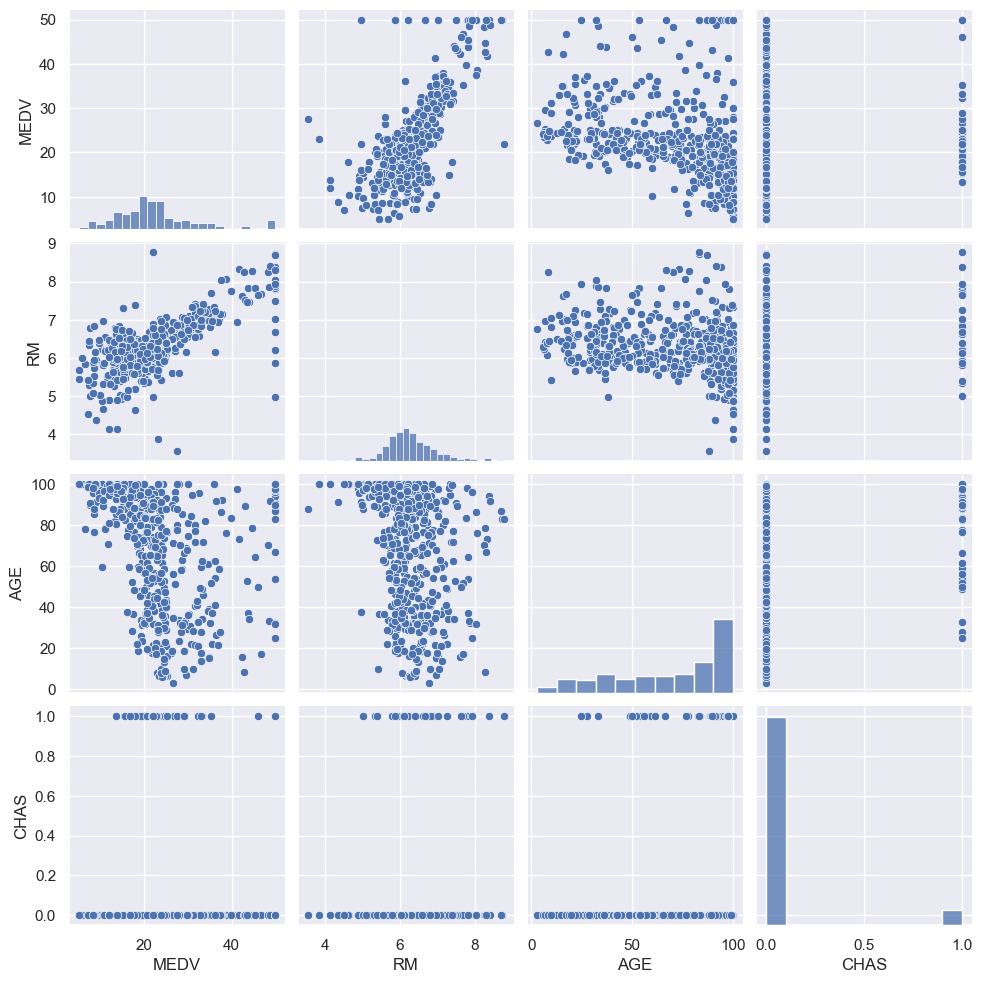

In [19]:
sns.set_style('darkgrid')
sns.pairplot(df[['MEDV', 'RM', 'AGE', 'CHAS']])
plt.show()

산점도 분석으로 종속변수인 집값(MEDV)과 방 개수(RM), 노후화 정도(AGE)와 상관관계 파악가능

- 방 개수가 증가할 수록 집값은 증가하는 경향
- 노후화 정도와 집값은 관계가 없는 듯
- 찰스강 유역 여부(CHAS)는 범주값이며 값이 1이면 0일 때 보다 집값의 평균이 더 높아지는 것 유추가능